# Introduction

 Here we will follow CRISP-DM guide 
* Business understanding
* Data understanding
* Data preparation
* Modeling
* Evaluation

# 1-  Business understanding

this is turnover data-set that focus on parameters that push employees to leave their work. And this analysis are made for Leaders to protet their talented employees from being left. and the best way is to predict when whey have well to leave before they take first step.

to know that we need to answer those questions:
* which parameter is the most relevent to make people leave their work?
* are the people who made job acciedent more leave or the oposite ?
* which type of jobs employee leave in short time ?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## ML Libraties



from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_predict

# 2-Data Understanding

In [2]:
df = pd.read_csv('turnover.csv')   # Reading The Data set to df 'data Frame'
df.head()                          # Printing the first 5 rows

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.describe()                    # printing some statistics abut the data 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.isnull().any()                   # If there are missing values

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [5]:
df.info()                        # discover if there are non numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


We find that Sales and salary are object 'non numerical data' so we should convert them

In [6]:
# First we work on Salary column 
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

We found that 'Sales' column has 10 unique values

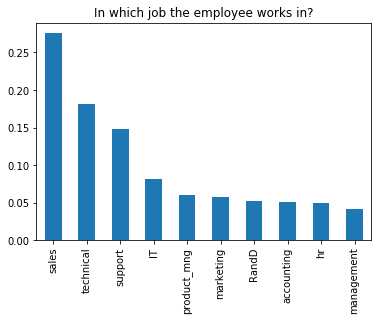

In [7]:
##using some visulization to see the destripution of the sales column
# we can see that 60% of the employees working in (sales, technical, support)

Job_type = df.sales.value_counts()

(Job_type/df.shape[0]).plot(kind="bar");
plt.title("In which job the employee works in?");

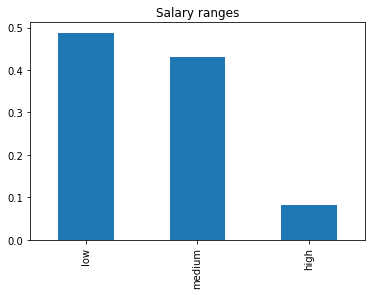

In [8]:
# the same for 'salary' column

salary_rang = df.salary.value_counts()
(salary_rang/df.shape[0]).plot(kind="bar");
plt.title("Salary ranges");

Only around 8% of employees are in high income range and the majority are in the low and medium range 

In [9]:
df.groupby(['sales']).mean()   #getting some insights by using groupby 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


To see clearly which job has the high lefting probapilty 

In [10]:
df.groupby(['sales']).mean()['left'].sort_values()     #hr is the most people who left 

sales
management     0.144444
RandD          0.153748
product_mng    0.219512
IT             0.222494
marketing      0.236597
sales          0.244928
support        0.248991
technical      0.256250
accounting     0.265971
hr             0.290934
Name: left, dtype: float64

In [11]:
df.groupby(['salary']).mean()['left'].sort_values()    #Also the lowest salary has the highest value 

salary
high      0.066289
medium    0.204313
low       0.296884
Name: left, dtype: float64

In [12]:
df.groupby(['promotion_last_5years']).mean()['left'].sort_values()  # 24% who didn't got promotion left 

promotion_last_5years
1    0.059561
0    0.241962
Name: left, dtype: float64

In [13]:
# Let's see how many employee gets promotion 

In [14]:
df.groupby(['promotion_last_5years']).mean()['left'].sort_values()  # 24% who didn't got promotion left 

promotion_last_5years
1    0.059561
0    0.241962
Name: left, dtype: float64

In [15]:
np.sum(df.time_spend_company >=5)/15000  # 18 % of the people only sepent moe=re than 5 years 

0.18366666666666667

In [16]:
df.loc[df['time_spend_company'] >= 5, ['promotion_last_5years']].mean() # 3% of who spend more than 5 years and only 

promotion_last_5years    0.034846
dtype: float64

In [17]:
df.promotion_last_5years.value_counts() #only 319 from 15000 who got promotion

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [18]:
df.groupby(['time_spend_company']).mean()['left'].sort_values() #approxmetlly all of the left people spent from 3 to 6 years
#and the most was 5 years

time_spend_company
7     0.000000
8     0.000000
10    0.000000
2     0.016338
3     0.246159
6     0.291086
4     0.348064
5     0.565513
Name: left, dtype: float64

In [19]:
#First we have to know how many data we have about who already left 
df.left.value_counts()/len(df.left)

0    0.761917
1    0.238083
Name: left, dtype: float64

Only 24% of the data represents the employees who have left the company, the data is not balanced so we should be careful while interpreting the accuracy of the predictive models

# Now we should see which column corolate the best with "Left" column

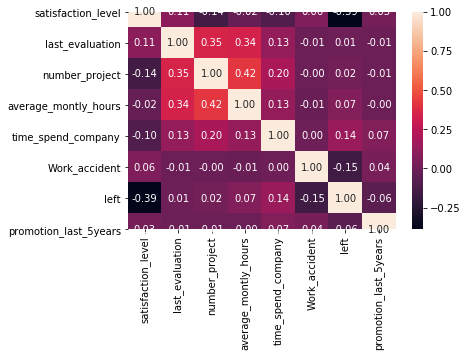

In [20]:
sns.heatmap(df.corr(), annot=True, fmt=".2f"); #negtive high corolation with satisfaction

We should study the satisfaction level because it's the most important one 

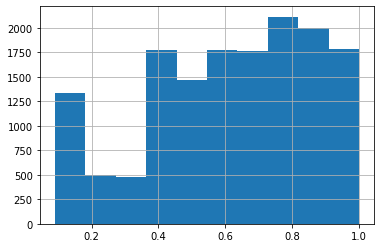

In [21]:
df.satisfaction_level.hist()

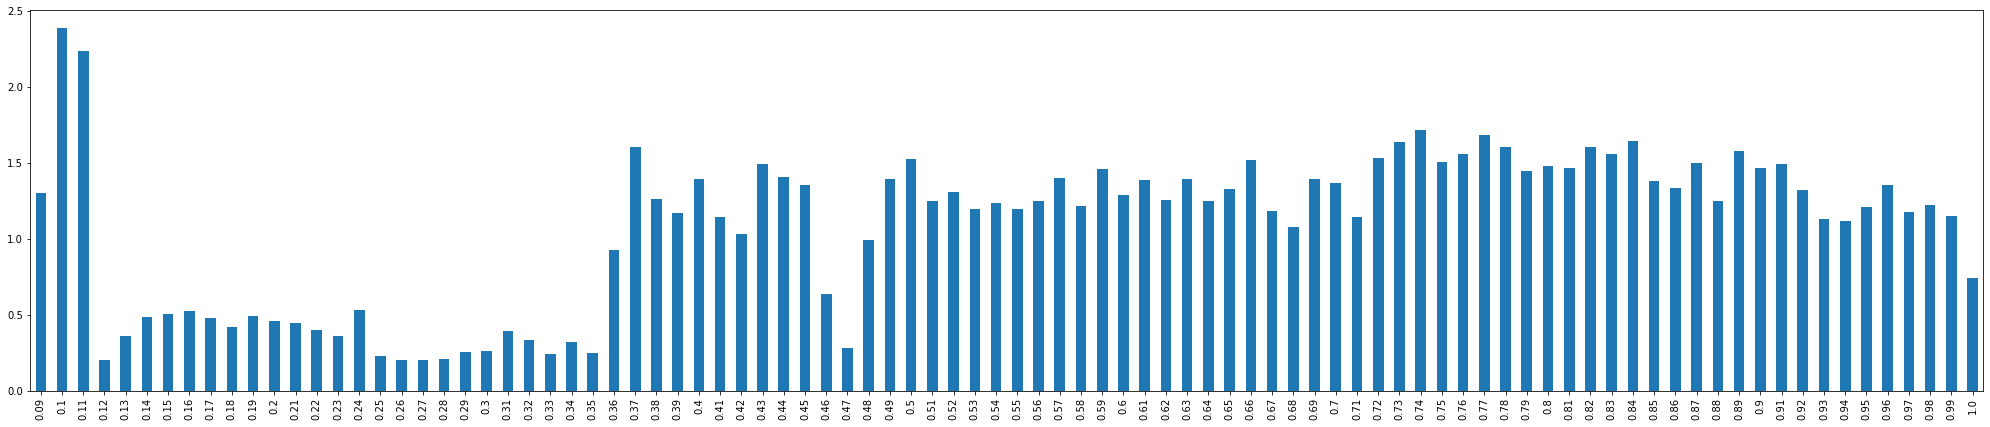

In [22]:
plt.figure(figsize=(35,7))
((df.satisfaction_level.value_counts().sort_index()/len(df.satisfaction_level))*100).plot(kind='bar')

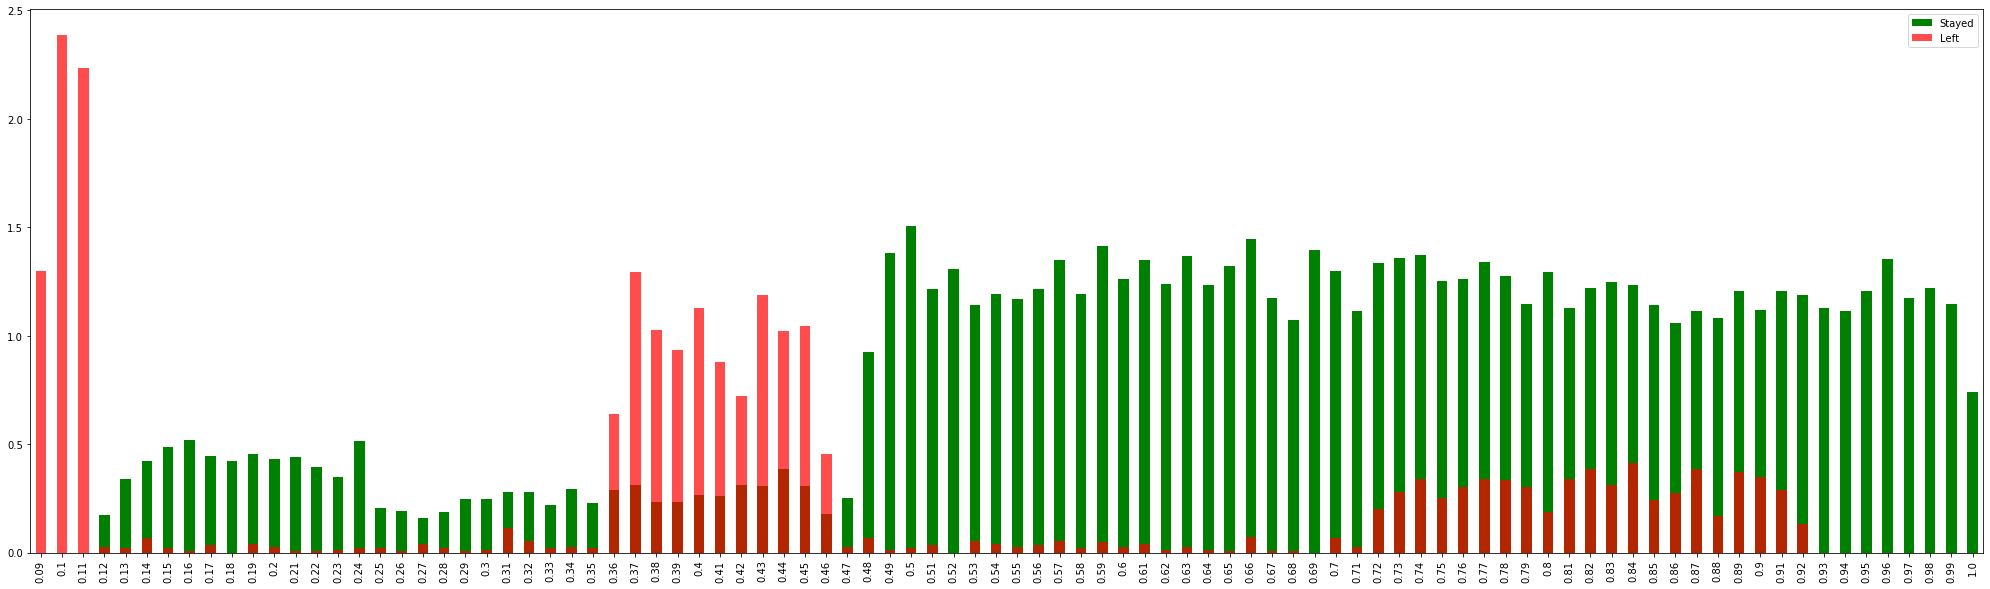

In [23]:
#Now we will plot the statisfaction again but with adding the left colomn

df.satisfaction_level = df.satisfaction_level.astype('category')
ax = pd.Series((df[df.left==0].satisfaction_level.value_counts()/len(df.left))*100).sort_index().plot(kind='bar',color='g',figsize=(35,10))
pd.Series((df[df.left==1].satisfaction_level.value_counts()/len(df.left))*100).sort_index().plot(kind='bar',color='r',alpha= 0.7,figsize=(35,10), ax=ax)
ax.legend(["Stayed", "Left"])

We can see that all who have satisfaction under 0.12 have left and that's expected, but majority of who voted 0.12 to 0.35 stayed, while from 0.36 to .46 have left 

In [24]:
df.groupby(['left']).mean()['Work_accident'].sort_values() # As not expected the people who made accident stay more than they left

left
1    0.047326
0    0.175009
Name: Work_accident, dtype: float64

It's clear that there is high -negative- corolation between Left and satisfaction_level and it make sense 
on the other hand work_accident has high negative corolation which mean the high accident works who stay !! 

# 3-Data Preparation


 first we should convert the categorical data to numerical

In [25]:
#First change the salary ranges to a numbers (0,1,2)
df['salary'] = df['salary'].map( {'high':2 ,'medium': 1, 'low': 0} ).astype(int)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [26]:
list_of_jobs = [] 
for var in df.sales:
   if var not in list_of_jobs:
    print (var)
    list_of_jobs.append(var)

sales
accounting
hr
technical
support
management
IT
product_mng
marketing
RandD


In [27]:
#Also for the Sales column we maped each job to a number from 0 to 9
df['sales'] = df.sales.map( {'management' : 0, 'RandD' : 1, 'product_mng' : 2, 'IT' : 3, 'marketing' : 4,
                             'sales' : 5, 'support' : 6, 'technical' : 7, 'accounting' : 8, 'hr' :9} ).astype(int)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,5,0
1,0.80,0.86,5,262,6,0,1,0,5,1
2,0.11,0.88,7,272,4,0,1,0,5,1
3,0.72,0.87,5,223,5,0,1,0,5,0
4,0.37,0.52,2,159,3,0,1,0,5,0


# 3- Modeling 

In [28]:
y = df.left.values                         # creating label column 
df.drop('left', inplace=True, axis=1)    

#Splitting the data to 20% test and 80% traning
X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size=0.20, random_state=42)  #Splitting the data to 20% test and


X_train.shape, X_test.shape

((11999, 9), (3000, 9))

In [29]:
decision_tree = DecisionTreeClassifier()               
decision_tree.fit(X_train, Y_train)
acc_decision_tree = decision_tree.score(X_test, Y_test)
acc_decision_tree

0.979

# 5- Evaluation

In [30]:
y_train_pred = cross_val_predict(decision_tree, X_train, Y_train, cv=3)
print('confusion_matrix= ',confusion_matrix(Y_train, y_train_pred))
print('\n Precision= ',precision_score(Y_train, y_train_pred))
print(' Recall= ',recall_score(Y_train, y_train_pred))


confusion_matrix=  [[8945  189]
 [ 113 2752]]

 Precision=  0.9357361441686501
 Recall=  0.9605584642233856
